In [ ]:
from google.colab import files
FileUpload = files.upload()  # This will open a file picker

In [ ]:
# Import libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')



In [ ]:
df = pd.read_json('problems_data.jsonl', lines= True)
df.head(10)

,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 ...",hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0 2 3 2 50 60 50 30 50 40', 'outpu...",hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/marioorluigi
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,"[{'input': '4 3 3 C 2 C 1 C', 'output': 'GHOST...",hard,9.6,https://open.kattis.com/problems/thewireghost
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,"[{'input': '2 0 10 0 10 10', 'output': '14.14'...",hard,9.6,https://open.kattis.com/problems/barktree
5,Mineral deposits,You handle signal processing for an extra-terr...,,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/boi23.mineral...
6,Multi-Class Binary Neural Network for Handwrit...,The objective of this problem is to train a Bi...,The program you submit should read no input.,,[],hard,9.6,https://open.kattis.com/problems/mnist10class
7,Bandit Raids,"Three rival gangs of bandits, the Marauders, t...",The input consists of $3$ space-separated posi...,"On the first line of output, print a single in...","[{'input': '3 8 2', 'output': '3 6 5 2 4 5 4 8...",hard,9.5,https://open.kattis.com/problems/banditraids
8,Breaking Bars,Selma is visited by her two grandchildren Elsa...,The first line of input contains two integers ...,Output the minimum number of breaks needed to ...,"[{'input': '4 15 1x2 2x2 3x3 3x5', 'output': '...",hard,9.5,https://open.kattis.com/problems/breakingbars
9,Special Cycle,You are given a simple undirected graph with n...,The first line of input contains three integer...,Output an integer denoting the length of the f...,[{'input': '8 10 3 1 2 4 5 7 8 2 3 3 4 1 4 5 6...,hard,9.5,https://open.kattis.com/problems/specialcycle


In [ ]:
import os
os.listdir()

['.config',
 'cleaned_data.csv',
 'problems_data.jsonl',
 'Problems_data.csv',
 'sample_data']

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               4112 non-null   object 
 1   description         4112 non-null   object 
 2   input_description   4112 non-null   object 
 3   output_description  4112 non-null   object 
 4   sample_io           4112 non-null   object 
 5   problem_class       4112 non-null   object 
 6   problem_score       4112 non-null   float64
 7   url                 4112 non-null   object 
dtypes: float64(1), object(7)
memory usage: 257.1+ KB


Hence we have no null values in the dataset provided


In [ ]:
df.iloc[0]

,0
title,Uuu
description,Unununium (Uuu) was the name of the chemical\n...
input_description,The input consists of one line with two intege...
output_description,The output consists of $M$ lines where the $i$...
sample_io,"[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 ..."
problem_class,hard
problem_score,9.7
url,https://open.kattis.com/problems/uuu


In [ ]:
df.applymap(type).head()

,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
0,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'str'>,<class 'float'>,<class 'str'>
1,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'str'>,<class 'float'>,<class 'str'>
2,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'str'>,<class 'float'>,<class 'str'>
3,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'str'>,<class 'float'>,<class 'str'>
4,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'str'>,<class 'float'>,<class 'str'>


In [ ]:
df.applymap(lambda x: isinstance(x, (dict, list))).any()


,0
title,False
description,False
input_description,False
output_description,False
sample_io,True
problem_class,False
problem_score,False
url,False


In [ ]:
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, (dict, list))).any():
        print(col)



sample_io


In [ ]:
col = "sample_io"
df[col].head(3)

,sample_io
0,"[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 ..."
1,"[{'input': '0 2 3 2 50 60 50 30 50 40', 'outpu..."
2,"[{'input': '', 'output': ''}]"


In [ ]:

df = df.drop(columns =['sample_io'])

In [ ]:
df.info


<bound method DataFrame.info of                              title  \
0                              Uuu   
1                   House Building   
2                   Mario or Luigi   
3                   The Wire Ghost   
4        Barking Up The Wrong Tree   
...                            ...   
4107       Tölvunarfræðingar telja   
4108                     Velkomin!   
4109                  Til hamingju   
4110                     Hipp Hipp   
4111  Advanced Causal Measurements   

                                            description  \
0     Unununium (Uuu) was the name of the chemical\n...   
1     A number of eccentrics from central New York h...   
2     Mario and Luigi are playing a game where they ...   
3     Žofka is bending a copper wire. She starts wit...   
4     Your dog Spot is let loose in the park. Well, ...   
...                                                 ...   
4107  Computer scientists count a bit different from...   
4108  Welcome to Forritunarkeppni Framhaldsskólanna ...   
4109                                                      
4110                                                      
4111  Causality is a very important concept in theor...   

                                      input_description  \
0     The input consists of one line with two intege...   
1     The input consists of $10$ test cases, which a...   
2                                                         
3     The first line contains two integers $L$ and $...   
4     The first line of input consists of two intege...   
...                                                 ...   
4107   Input consists of one line with one integer $n$.   
4108                 There is no input in this problem.   
4109                 There is no input in this problem.   
4110                 There is no input in this problem.   
4111  The first line of input is the number of cases...   

                                     output_description problem_class  \
0     The output consists of $M$ lines where the $i$...          hard   
1     Print $K$ lines with\n    the positions of the...          hard   
2                                                                hard   
3     The output consists of a single line consistin...          hard   
4     Write a single line containing the length need...          hard   
...                                                 ...           ...   
4107  Output the $n$-th\n    number, according to co...          easy   
4108           Print a single line containing VELKOMIN!          easy   
4109  Print a single line containing TIL\n    HAMING...          easy   
4110  Print 20 lines. Each line should contain Hipp ...          easy   
4111  Output consists of a single line for each case...          hard   

      problem_score                                                url  
0               9.7               https://open.kattis.com/problems/uuu  
1               9.7          https://open.kattis.com/problems/husbygge  
2               9.6      https://open.kattis.com/problems/marioorluigi  
3               9.6      https://open.kattis.com/problems/thewireghost  
4               9.6          https://open.kattis.com/problems/barktree  
...             ...                                                ...  
4107            1.1  https://open.kattis.com/problems/tolvunarfraed...  
4108            1.1          https://open.kattis.com/problems/velkomin  
4109            1.1       https://open.kattis.com/problems/tilhamingju  
4110            1.1          https://open.kattis.com/problems/hipphipp  
4111            6.5            https://open.kattis.com/problems/causal  

[4112 rows x 7 columns]>

In [ ]:
df.head()


,title,description,input_description,output_description,problem_class,problem_score,url
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,hard,9.6,https://open.kattis.com/problems/marioorluigi
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,hard,9.6,https://open.kattis.com/problems/thewireghost
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,hard,9.6,https://open.kattis.com/problems/barktree


In [ ]:
df.to_csv("Problems_data.csv", index=False)

In [ ]:
df.head()

,title,description,input_description,output_description,problem_class,problem_score,url
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,hard,9.6,https://open.kattis.com/problems/marioorluigi
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,hard,9.6,https://open.kattis.com/problems/thewireghost
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,hard,9.6,https://open.kattis.com/problems/barktree


In [ ]:
df.isnull().sum()

,0
title,0
description,0
input_description,0
output_description,0
problem_class,0
problem_score,0
url,0


In [ ]:
df['problem_score'].describe()

,problem_score
count,4112.000000
mean,5.114689
std,2.177770
min,1.100000
25%,3.300000
50%,5.200000
75%,6.900000
max,9.700000


In [ ]:
df['problem_class'].value_counts()

,count
problem_class,
hard,1941
medium,1405
easy,766


In [ ]:
duplicates = df.duplicated().sum()
print(f" Duplicate Rows: {duplicates}")
if duplicates >= 0:
    print("  Removing duplicates...")
    df = df.drop_duplicates()
    print(f"  After removal: {df.shape[0]} rows")


 Duplicate Rows: 1
  Removing duplicates...
  After removal: 4111 rows


In [ ]:
print("\n Missing Values Analysis:")
missing_info = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Data_Type': df.dtypes}
)
print(missing_info)


 Missing Values Analysis:
                    Missing_Count  Missing_Percentage Data_Type
title                           0                 0.0    object
description                     0                 0.0    object
input_description               0                 0.0    object
output_description              0                 0.0    object
problem_class                   0                 0.0    object
problem_score                   0                 0.0   float64
url                             0                 0.0    object


In [ ]:


if 'problem_class' in df.columns:
    class_counts = df['problem_class'].value_counts()
    print(f" TargetVariable= {class_counts} ")
    print(f"\n Calculating the Class Balance Ratio:")

    for cls in class_counts.index:
        ratio = (class_counts[cls] / len(df)) * 100
        print(f"   {cls}: {ratio:.1f}%")

 TargetVariable= problem_class
hard      1940
medium    1405
easy       766
Name: count, dtype: int64 

 Calculating the Class Balance Ratio:
   hard: 47.2%
   medium: 34.2%
   easy: 18.6%


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
#print(num_cols)
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

outlier_summary = {}

for col in num_cols:
    outliers = detect_outliers_iqr(df[col])
    outlier_summary[col] = outliers.sum()

outlier_summary

{'problem_score': np.int64(0)}

<Axes: >

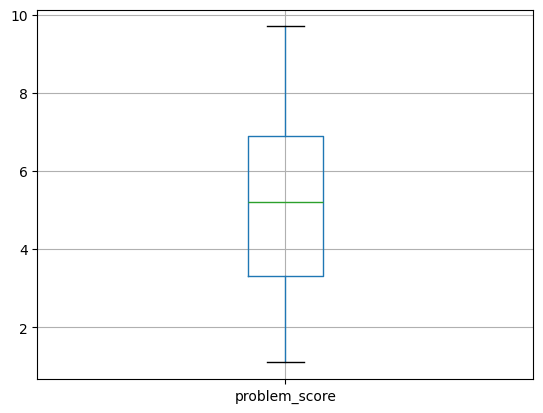

In [ ]:

df.boxplot(column='problem_score')
#df['problem_score'].describe()
# we find not outliers

In [ ]:
import re
text_columns = ['title', 'description', 'input_description', 'output_description', 'url']
def clean_text(text):
    if pd.isna(text) or text == '':
        return ''

    text = str(text).lower()
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()

    return text

# Apply cleaning to text columns
for col in text_columns:

        df[col] = df[col].apply(clean_text)

print("Text cleaning complete")

Text cleaning complete


In [ ]:
df.head()

,title,description,input_description,output_description,problem_class,problem_score,url
0,uuu,unununium (uuu) was the name of the chemical e...,the input consists of one line with two intege...,the output consists of $m$ lines where the $i$...,hard,9.7,https://open.kattis.com/problems/uuu
1,house building,a number of eccentrics from central new york h...,"the input consists of $10$ test cases, which a...",print $k$ lines with the positions of the hous...,hard,9.7,https://open.kattis.com/problems/husbygge
2,mario or luigi,mario and luigi are playing a game where they ...,,,hard,9.6,https://open.kattis.com/problems/marioorluigi
3,the wire ghost,žofka is bending a copper wire. she starts wit...,the first line contains two integers $l$ and $...,the output consists of a single line consistin...,hard,9.6,https://open.kattis.com/problems/thewireghost
4,barking up the wrong tree,"your dog spot is let loose in the park. well, ...",the first line of input consists of two intege...,write a single line containing the length need...,hard,9.6,https://open.kattis.com/problems/barktree


In [ ]:
print(df.columns.tolist())


['title', 'description', 'input_description', 'output_description', 'problem_class', 'problem_score', 'url']


In [ ]:
# stemming and lemmatization
import nltk
import pandas as pd

# Download required NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

print("Libraries imported successfully")

Libraries imported successfully


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df.shape

(4111, 7)

In [ ]:

# Combine all text columns into one
df['full_text'] = ''

for col in text_columns:
    if col in df.columns:
        df['full_text'] = df['full_text'] + ' ' + df[col]

df['full_text'] = df['full_text'].str.strip()

print("Combined text statistics:")
print(f"Average length: {df['full_text'].str.len().mean():.0f}")
print(f"Min length: {df['full_text'].str.len().min()}")
print(f"Max length: {df['full_text'].str.len().max()}")

df.head()

Combined text statistics:
Average length: 1562
Min length: 51
Max length: 6692


,title,description,input_description,output_description,problem_class,problem_score,url,full_text
0,uuu,unununium (uuu) was the name of the chemical e...,the input consists of one line with two intege...,the output consists of $m$ lines where the $i$...,hard,9.7,https://open.kattis.com/problems/uuu,uuu unununium (uuu) was the name of the chemic...
1,house building,a number of eccentrics from central new york h...,"the input consists of $10$ test cases, which a...",print $k$ lines with the positions of the hous...,hard,9.7,https://open.kattis.com/problems/husbygge,house building a number of eccentrics from cen...
2,mario or luigi,mario and luigi are playing a game where they ...,,,hard,9.6,https://open.kattis.com/problems/marioorluigi,mario or luigi mario and luigi are playing a g...
3,the wire ghost,žofka is bending a copper wire. she starts wit...,the first line contains two integers $l$ and $...,the output consists of a single line consistin...,hard,9.6,https://open.kattis.com/problems/thewireghost,the wire ghost žofka is bending a copper wire....
4,barking up the wrong tree,"your dog spot is let loose in the park. well, ...",the first line of input consists of two intege...,write a single line containing the length need...,hard,9.6,https://open.kattis.com/problems/barktree,barking up the wrong tree your dog spot is let...


In [ ]:
# Remove rows where combined text is too short
min_text_length = 500
df = df[df['full_text'].str.len() >= min_text_length]

print(f"Rows remaining: {len(df)}")
df.shape

Rows remaining: 3996


(3996, 8)

In [ ]:
df["text_length"] = df["full_text"].apply(len)

df.groupby("problem_class")["text_length"].mean()

,text_length
problem_class,
easy,1313.143454
hard,1705.283551
medium,1592.922964


In [ ]:
import numpy as np

keywords = [
    "graph", "tree", "dp", "dynamic programming",
    "recursion", "greedy", "dfs", "bfs", "binary"
]

def keyword_count(text):
    text = text.lower()
    return sum(text.count(k) for k in keywords)

df["word_count"] = df["full_text"].apply(lambda x: len(x.split()))
df["symbol_count"] = df["full_text"].apply(
    lambda x: sum(x.count(s) for s in "+-*/=%")
)
df["keyword_count"] = df["full_text"].apply(keyword_count)

numeric_features = df[
    ["word_count", "symbol_count", "keyword_count"]
].values
X_train_numfeatures ,X_test_numfeatures = train_test_split(
    numeric_features,
    test_size=0.2,
    random_state=42
)


In [ ]:
df.head()

,title,description,input_description,output_description,problem_class,problem_score,url,full_text,text_length,word_count,symbol_count,keyword_count
0,uuu,unununium (uuu) was the name of the chemical e...,the input consists of one line with two intege...,the output consists of $m$ lines where the $i$...,hard,9.7,https://open.kattis.com/problems/uuu,uuu unununium (uuu) was the name of the chemic...,1604,286,7,5
1,house building,a number of eccentrics from central new york h...,"the input consists of $10$ test cases, which a...",print $k$ lines with the positions of the hous...,hard,9.7,https://open.kattis.com/problems/husbygge,house building a number of eccentrics from cen...,1371,240,7,0
2,mario or luigi,mario and luigi are playing a game where they ...,,,hard,9.6,https://open.kattis.com/problems/marioorluigi,mario or luigi mario and luigi are playing a g...,1275,219,4,2
3,the wire ghost,žofka is bending a copper wire. she starts wit...,the first line contains two integers $l$ and $...,the output consists of a single line consistin...,hard,9.6,https://open.kattis.com/problems/thewireghost,the wire ghost žofka is bending a copper wire....,1347,237,4,0
4,barking up the wrong tree,"your dog spot is let loose in the park. well, ...",the first line of input consists of two intege...,write a single line containing the length need...,hard,9.6,https://open.kattis.com/problems/barktree,barking up the wrong tree your dog spot is let...,2162,407,4,10


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = scaler.fit_transform(numeric_features)

In [ ]:
df.to_csv('cleaned_data.csv', index=False)
print("Data saved to cleaned_data.csv")




Data saved to cleaned_data.csv


In [ ]:
os.listdir()

['.config',
 'cleaned_data.csv',
 'problems_data.jsonl',
 'Problems_data.csv',
 'sample_data']

In [ ]:
from google.colab import files
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df2 = pd.read_csv('cleaned_data.csv')
print(df2.shape)
df2.head()

(3996, 12)


,title,description,input_description,output_description,problem_class,problem_score,url,full_text,text_length,word_count,symbol_count,keyword_count
0,uuu,unununium (uuu) was the name of the chemical e...,the input consists of one line with two intege...,the output consists of $m$ lines where the $i$...,hard,9.7,https://open.kattis.com/problems/uuu,uuu unununium (uuu) was the name of the chemic...,1604,286,7,5
1,house building,a number of eccentrics from central new york h...,"the input consists of $10$ test cases, which a...",print $k$ lines with the positions of the hous...,hard,9.7,https://open.kattis.com/problems/husbygge,house building a number of eccentrics from cen...,1371,240,7,0
2,mario or luigi,mario and luigi are playing a game where they ...,NaN,NaN,hard,9.6,https://open.kattis.com/problems/marioorluigi,mario or luigi mario and luigi are playing a g...,1275,219,4,2
3,the wire ghost,žofka is bending a copper wire. she starts wit...,the first line contains two integers $l$ and $...,the output consists of a single line consistin...,hard,9.6,https://open.kattis.com/problems/thewireghost,the wire ghost žofka is bending a copper wire....,1347,237,4,0
4,barking up the wrong tree,"your dog spot is let loose in the park. well, ...",the first line of input consists of two intege...,write a single line containing the length need...,hard,9.6,https://open.kattis.com/problems/barktree,barking up the wrong tree your dog spot is let...,2162,407,4,10


In [ ]:
os.listdir()

['.config',
 'cleaned_data.csv',
 'problems_data.jsonl',
 'Problems_data.csv',
 'sample_data']

In [ ]:
# Initialize stemmer
import nltk
nltk.download('punkt_tab')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

def apply_stemming(text):
    if pd.isna(text) or text == '':
        return ''

    # Tokenize text into words
    words = word_tokenize(str(text))

    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in words]

    # Join words back into text
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

# Apply stemming to full_text
df2['text_stemmed'] = df2['full_text'].apply(apply_stemming)

print("Stemming complete")
print("\nExample:")
print("Original:", df2['full_text'].iloc[0][:200])
print("\nStemmed:", df2['text_stemmed'].iloc[0][:200])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Stemming complete

Example:
Original: uuu unununium (uuu) was the name of the chemical element with atom number 111, until it changed to röntgenium (rg) in 2004. these heavy elements are very unstable and have only been synthesized in a f

Stemmed: uuu unununium ( uuu ) wa the name of the chemic element with atom number 111 , until it chang to röntgenium ( rg ) in 2004. these heavi element are veri unstabl and have onli been synthes in a few lab


In [ ]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(text):
    if pd.isna(text) or text == '':
        return ''

    # Tokenize text into words
    words = word_tokenize(str(text))

    # Apply lemmatization to each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back into text
    lemmatized_text = ' '.join(lemmatized_words)

    return lemmatized_text

# Apply lemmatization to full_text
df2['text_lemmatized'] = df2['full_text'].apply(apply_lemmatization)

print("Lemmatization complete")
print("\nExample:")
print("Original:", df2['full_text'].iloc[0][:200])
print("\nLemmatized:", df2['text_lemmatized'].iloc[0][:200])

Lemmatization complete

Example:
Original: uuu unununium (uuu) was the name of the chemical element with atom number 111, until it changed to röntgenium (rg) in 2004. these heavy elements are very unstable and have only been synthesized in a f

Lemmatized: uuu unununium ( uuu ) wa the name of the chemical element with atom number 111 , until it changed to röntgenium ( rg ) in 2004. these heavy element are very unstable and have only been synthesized in 


In [ ]:
# X= df2['full_text'];
# y_class = df2['problem_class'];
# y_reg = df2['problem_score'];

# X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
#     X,
#     y_class,
#     y_reg,
#     test_size=0.2,
#     random_state=42,
#     stratify=y_class
# )
# print("Train-test split complete")

In [ ]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF configuration
tfidf_params = {
    'max_features': 6000,
    'ngram_range': (1, 3),
    'stop_words': 'english',
    'min_df': 3,
    'max_df': 0.9
}

# Feature weights for each column
feature_weights = {
    "title": 1.0,
    "description": 1.5,
    "input_description": 1.25,
    "output_description": 1.10
}

text_columns = list(feature_weights.keys())

# Fill missing values
df[text_columns] = df[text_columns].fillna("").astype(str)

# STEP 1: Split data FIRST (preserving both target columns)
# Replace 'regression_target' and 'classification_target' with your actual column names
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['problem_class']  # Optional: for balanced splits on classification
)

# STEP 2: Fit vectorizers ONLY on training data
vectorizers = {}
train_matrices = []
test_matrices = []

for col, weight in feature_weights.items():
    # Create vectorizer
    vectorizer = TfidfVectorizer(**tfidf_params)

    # FIT on training data only, then TRANSFORM
    X_train_col = vectorizer.fit_transform(train_df[col])

    # ONLY TRANSFORM on test data (using vocab learned from train)
    X_test_col = vectorizer.transform(test_df[col])

    # Apply weights
    X_train_col = X_train_col * weight
    X_test_col = X_test_col * weight

    # Store
    vectorizers[col] = vectorizer
    train_matrices.append(X_train_col)
    test_matrices.append(X_test_col)

# STEP 3: Combine matrices
X_train_tfidf = hstack(train_matrices)
X_test_tfidf = hstack(test_matrices)

# STEP 4: Extract target variables
y_reg_train = train_df['problem_score'].values
y_reg_test = test_df['problem_score'].values

y_class_train = train_df['problem_class'].values
y_class_test = test_df['problem_class'].values

print(f"Train shape: {X_train_tfidf.shape}")
print(f"Test shape: {X_test_tfidf.shape}")
print(f"Train samples: {len(y_reg_train)}")
print(f"Test samples: {len(y_reg_test)}")
print(f"Train samples: {len(y_class_train)}")
print(f"Test samples: {len(y_class_test)}")


# Now you can train separate models
# Regression model
# reg_model.fit(X_train, y_train_regression)
# reg_predictions = reg_model.predict(X_test)

# Classification model
# clf_model.fit(X_train, y_train_classification)
# clf_predictions = clf_model.predict(X_test)
print("Train-test split complete")

Train shape: (3196, 16229)
Test shape: (800, 16229)
Train samples: 3196
Test samples: 800
Train samples: 3196
Test samples: 800
Train-test split complete


In [ ]:
print(train_matrices)

[<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2117 stored elements and shape (3196, 426)>, <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 166875 stored elements and shape (3196, 6000)>, <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 118918 stored elements and shape (3196, 6000)>, <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 56722 stored elements and shape (3196, 3803)>]


In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(
    n_components=1900,
    random_state=42)

X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)
print("SVD Complete")


SVD Complete


In [ ]:
print(svd.explained_variance_ratio_.sum())

0.8740039489390067


In [ ]:
print(type(X_train_svd))

<class 'numpy.ndarray'>


In [ ]:
X_train = np.hstack([X_train_svd, X_train_numfeatures])
X_test  = np.hstack([X_test_svd, X_test_numfeatures])
X_train.shape,X_test.shape

((3196, 1903), (800, 1903))

In [ ]:
#from scipy.sparse import hstack

#X_train = hstack([X_train, X_train_numfeatures])
#X_test = hstack([X_test, X_test_numfeatures])

le= LabelEncoder()
y_class_train = le.fit_transform(y_class_train)
y_class_test = le.transform(y_class_test)


y_reg_train = y_reg_train.astype(float)
y_reg_test = y_reg_test.astype(float)


X_train.shape,X_test.shape,y_class_train.shape,y_class_test.shape,y_reg_train.shape,y_reg_test.shape

((3196, 1903), (800, 1903), (3196,), (800,), (3196,), (800,))

In [ ]:
X = df2['full_text'];
y_class = df2['problem_class'];
y_reg = df2['problem_score'];

In [ ]:
print("TF-IDF Vectorization complete")
print(X_train)
print(y_class)
print(y_reg)


TF-IDF Vectorization complete
[[ 3.86240995e-01 -8.23361413e-02  1.88116161e-01 ...  2.90000000e+02
   9.00000000e+00  0.00000000e+00]
 [ 5.04637730e-01 -1.60594632e-01 -3.02015430e-01 ...  4.06000000e+02
   6.00000000e+00  0.00000000e+00]
 [ 2.61899538e-01 -2.60505462e-02  1.14912086e-01 ...  1.16000000e+02
   4.00000000e+00  0.00000000e+00]
 ...
 [ 5.32570261e-01 -1.03792092e-02  2.22061485e-01 ...  2.14000000e+02
   4.00000000e+00  0.00000000e+00]
 [ 3.69513538e-01 -5.27416884e-03  3.11101989e-01 ...  1.48000000e+02
   6.00000000e+00  0.00000000e+00]
 [ 4.98681564e-01 -2.06473589e-01 -4.29221811e-01 ...  2.76000000e+02
   8.00000000e+00  0.00000000e+00]]
0       hard
1       hard
2       hard
3       hard
4       hard
        ... 
3991    easy
3992    easy
3993    easy
3994    easy
3995    easy
Name: problem_class, Length: 3996, dtype: object
0       9.7
1       9.7
2       9.6
3       9.6
4       9.6
       ... 
3991    1.2
3992    1.2
3993    1.1
3994    1.1
3995    1.1
Name: prob

In [ ]:
df.head()

,title,description,input_description,output_description,problem_class,problem_score,url,full_text,text_length,word_count,symbol_count,keyword_count
0,uuu,unununium (uuu) was the name of the chemical e...,the input consists of one line with two intege...,the output consists of $m$ lines where the $i$...,hard,9.7,https://open.kattis.com/problems/uuu,uuu unununium (uuu) was the name of the chemic...,1604,286,7,5
1,house building,a number of eccentrics from central new york h...,"the input consists of $10$ test cases, which a...",print $k$ lines with the positions of the hous...,hard,9.7,https://open.kattis.com/problems/husbygge,house building a number of eccentrics from cen...,1371,240,7,0
2,mario or luigi,mario and luigi are playing a game where they ...,,,hard,9.6,https://open.kattis.com/problems/marioorluigi,mario or luigi mario and luigi are playing a g...,1275,219,4,2
3,the wire ghost,žofka is bending a copper wire. she starts wit...,the first line contains two integers $l$ and $...,the output consists of a single line consistin...,hard,9.6,https://open.kattis.com/problems/thewireghost,the wire ghost žofka is bending a copper wire....,1347,237,4,0
4,barking up the wrong tree,"your dog spot is let loose in the park. well, ...",the first line of input consists of two intege...,write a single line containing the length need...,hard,9.6,https://open.kattis.com/problems/barktree,barking up the wrong tree your dog spot is let...,2162,407,4,10


In [ ]:
# #X_text = df['full_text']
# tfidf = TfidfVectorizer(
#     max_features=1300,
#     ngram_range=(1,3),
#     stop_words='english',
#     min_df=3,
#     max_df = 0.9
# )

# X_train= tfidf.fit_transform(X_train)
# X_test = tfidf.transform(X_test)

# le= LabelEncoder()
# y_class_train = le.fit_transform(y_class_train)
# y_class_test = le.transform(y_class_test)


# y_reg_train = y_reg_train.astype(float)
# y_reg_test = y_reg_test.astype(float)


# print("TF-IDF Vectorization complete")
# print(X)
# print(y_class)
# print(y_reg)

In [ ]:

X_train.shape, X_test.shape, y_class_train.shape, y_class_test.shape, y_reg_train.shape, y_reg_test.shape

((3196, 1903), (800, 1903), (3196,), (800,), (3196,), (800,))

In [ ]:
# Train model
lr = LogisticRegression(max_iter=600, random_state=52)
lr.fit(X_train, y_class_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
accuracy_lr = accuracy_score(y_class_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

print(type(y_class_test))
print(type(y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_class_test, y_pred_lr, target_names=[str(c) for c in le.classes_]))

Logistic Regression Accuracy: 0.5112
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

Classification Report:
              precision    recall  f1-score   support

        easy       0.52      0.34      0.41       144
        hard       0.57      0.67      0.62       383
      medium       0.41      0.38      0.39       273

    accuracy                           0.51       800
   macro avg       0.50      0.46      0.47       800
weighted avg       0.50      0.51      0.50       800



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf_model = RandomForestClassifier(n_estimators=500,
                                  max_depth=20,
                                  min_samples_split=10,
                                  min_samples_leaf=4,
                                  random_state=42,
                                  n_jobs=-1)
rf_model.fit(X_train, y_class_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_class_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_class_test, y_pred_rf, target_names=[str(c) for c in le.classes_]))

Random Forest Accuracy: 0.4813

Classification Report:
              precision    recall  f1-score   support

        easy       1.00      0.01      0.01       144
        hard       0.48      1.00      0.65       383
      medium       0.67      0.01      0.01       273

    accuracy                           0.48       800
   macro avg       0.72      0.34      0.23       800
weighted avg       0.64      0.48      0.32       800



In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(
    C=0.03,
    class_weight='balanced',
    max_iter=2000,
    random_state=52
)

svm_model.fit(X_train, y_class_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_svmlin = svm_model.predict(X_test)
# Evaluate
accuracy_svm = accuracy_score(y_class_test, y_pred_svmlin)
print(f"LinearSVC Accuracy: {accuracy_svm:.4f}")

print("\nClassification Report:")
print(classification_report(y_class_test, y_pred_svmlin))
print("\nConfusion Matrix:")
print(confusion_matrix(y_class_test, y_pred_svmlin))


LinearSVC Accuracy: 0.5038

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.40      0.42       144
           1       0.56      0.71      0.63       383
           2       0.40      0.27      0.32       273

    accuracy                           0.50       800
   macro avg       0.47      0.46      0.46       800
weighted avg       0.48      0.50      0.49       800


Confusion Matrix:
[[ 58  50  36]
 [ 35 271  77]
 [ 39 160  74]]


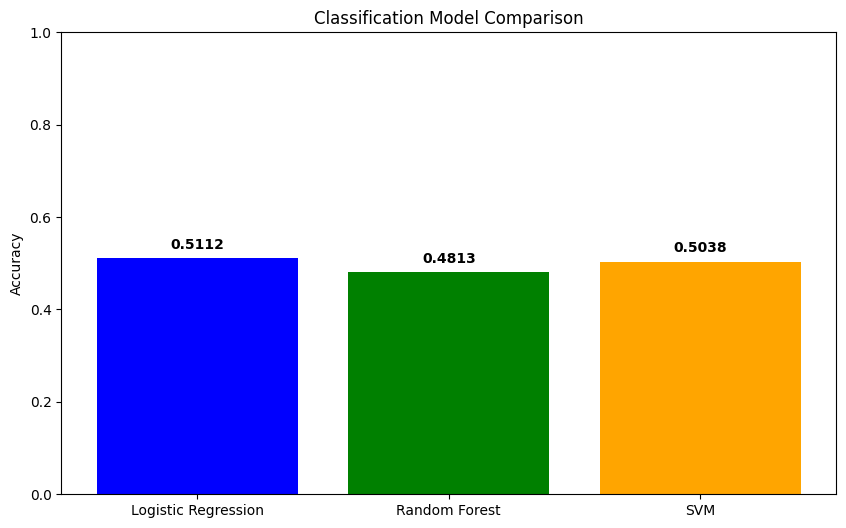


Best model: Logistic Regression


In [ ]:
import matplotlib.pyplot as plt

# Compare accuracies
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [accuracy_lr, accuracy_rf, accuracy_svm]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Classification Model Comparison')
plt.ylim([0, 1])
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')
plt.show()

print("\nBest model:", models[np.argmax(accuracies)])

In [ ]:


# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_reg_train)

# Predict
y_pred_linreg = lin_reg.predict(X_test)

# Evaluate
mae_lin = mean_absolute_error(y_reg_test, y_pred_linreg)
rmse_lin = np.sqrt(mean_squared_error(y_reg_test, y_pred_linreg))
r2_lin = r2_score(y_reg_test, y_pred_linreg)

print("Linear Regression:")
print(f"MAE: {mae_lin:.2f}")
print(f"RMSE: {rmse_lin:.2f}")
print(f"R2 Score: {r2_lin:.4f}")

Linear Regression:
MAE: 1.81
RMSE: 2.21
R2 Score: -0.0202


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001, max_iter=10000)
lasso.fit(X_train, y_reg_train)
#print(lasso.n_iter_)

y_pred_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_reg_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_reg_test, y_pred_lasso))
r2_lasso = r2_score(y_reg_test, y_pred_lasso)

print("Lasso Regression:")
print(f"MAE: {mae_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R2 Score: {r2_lasso:.4f}")

Lasso Regression:
MAE: 1.73
RMSE: 2.06
R2 Score: 0.1182


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,              # prevents mean-collapse
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_reg.fit(X_train, y_class_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_regrf = rf_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_class_test, y_pred_regrf))
print("RMSE:", np.sqrt(mean_squared_error(y_class_test, y_pred_regrf)))
print("R2:", r2_score(y_class_test, y_pred_regrf))


MAE: 0.5825993320868225
RMSE: 0.7021369595226681
R2: 0.004547470323443936


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid = {
    'alpha': [0.1, 1, 10, 50, 100]
}

grid = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X_train, y_reg_train)

best_ridge = grid.best_estimator_


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print("\n" + "=" * 60)
print("BEST RIDGE REGRESSION PARAMETERS")
print("=" * 60)
print(f"Best alpha: {grid.best_params_['alpha']}")
print(f"Best CV R² Score: {grid.best_score_:.4f}")

# ============================================
# TEST SET EVALUATION
# ============================================

print("\n" + "=" * 60)
print("RIDGE REGRESSION TEST PERFORMANCE")
print("=" * 60)

# Predictions
y_pred_ridge = best_ridge.predict(X_test)

# Metrics
mse = mean_squared_error(y_reg_test, y_pred_ridge)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_reg_test, y_pred_ridge)
r2 = r2_score(y_reg_test, y_pred_ridge)

print(f"Mean Squared Error (MSE):  {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# ============================================
# SAMPLE PREDICTIONS
# ============================================

print("\n" + "=" * 60)
print("SAMPLE PREDICTIONS (First 10)")
print("=" * 60)

print(f"{'Actual':<15}{'Predicted':<15}{'Difference':<15}")
print("-" * 45)

for actual, pred in zip(y_reg_test[:10], y_pred_ridge[:10]):
    diff = actual - pred
    print(f"{actual:<15.2f}{pred:<15.2f}{diff:<15.2f}")


print("\nModel trained successfully!")
print("Model available in: best_ridge")



BEST RIDGE REGRESSION PARAMETERS
Best alpha: 10
Best CV R² Score: 0.1290

RIDGE REGRESSION TEST PERFORMANCE
Mean Squared Error (MSE):  4.1562
Root Mean Squared Error (RMSE): 2.0387
Mean Absolute Error (MAE): 1.7268
R² Score: 0.1338

SAMPLE PREDICTIONS (First 10)
Actual         Predicted      Difference     
---------------------------------------------
4.20           5.04           -0.84          
4.20           5.35           -1.15          
1.90           4.09           -2.19          
6.00           4.64           1.36           
2.50           5.44           -2.94          
5.60           6.00           -0.40          
9.10           4.58           4.52           
3.20           4.57           -1.37          
4.00           6.33           -2.33          
7.20           5.77           1.43           

TOP 10 MOST IMPORTANT FEATURES (by |coefficient|)
1. Feature 4: Coefficient = -2.0134
2. Feature 37: Coefficient = 1.5717
3. Feature 12: Coefficient = 1.3942
4. Feature 21: Coefficien

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Gradient Boosting Regressor
print("Training Gradient Boosting Regressor...")

gb_reg = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=7,
    min_samples_split=20,
    min_samples_leaf=10,
    subsample=0.8,
    random_state=42,
    verbose=1
)

# Fit the model
gb_reg.fit(X_train, y_reg_train)

print("Training complete")
# Predict on test set
y_pred_reg = gb_reg.predict(X_test)

# Predict on train set (to check overfitting)
y_pred_train = gb_reg.predict(X_train)

print("Predictions complete")

# Test set metrics
mae_test = mean_absolute_error(y_reg_test, y_pred_reg)
rmse_test = np.sqrt(mean_squared_error(y_reg_test, y_pred_reg))
r2_test = r2_score(y_reg_test, y_pred_reg)

# Training set metrics (to check overfitting)
mae_train = mean_absolute_error(y_reg_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_reg_train, y_pred_train))
r2_train = r2_score(y_reg_train, y_pred_train)

print("="*60)
print("GRADIENT BOOSTING REGRESSION RESULTS")
print("="*60)

print("\nTest Set Performance:")
print(f"MAE:  {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2 Score: {r2_test:.4f}")

print("\nTraining Set Performance:")
print(f"MAE:  {mae_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2 Score: {r2_train:.4f}")

# Check for overfitting
if r2_train - r2_test > 0.1:
    print("\nWarning: Model might be overfitting")
else:
    print("\nModel generalization looks good")

Training Gradient Boosting Regressor...
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           4.4886           0.0278           30.18m
         2           4.3165           0.0699           29.16m
         3           4.1881           0.1403           29.87m
         4           4.0827           0.2477           29.29m
         5           3.9479           0.0978           29.52m
         6           3.7703          -0.0785           29.14m
         7           3.7221           0.3780           29.31m
         8           3.5937           0.0768           29.01m
         9           3.5114           0.1321           29.13m
        10           3.3811          -0.0617           28.91m
        20           2.5151          -0.0664           27.97m
        30           1.9616           0.0950           27.15m
        40           1.4623           0.0098           26.13m
        50           1.2168           0.1110           25.25m
        60           0.9305  